<a href="https://colab.research.google.com/github/NaNeNiNi7524/Machine-Learning-projects/blob/main/MEDICAL_INSURANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [2]:
dataset = pd.read_csv('/content/insurance.csv')

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<ipython-input-16-35fa947c7c77>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['age'])


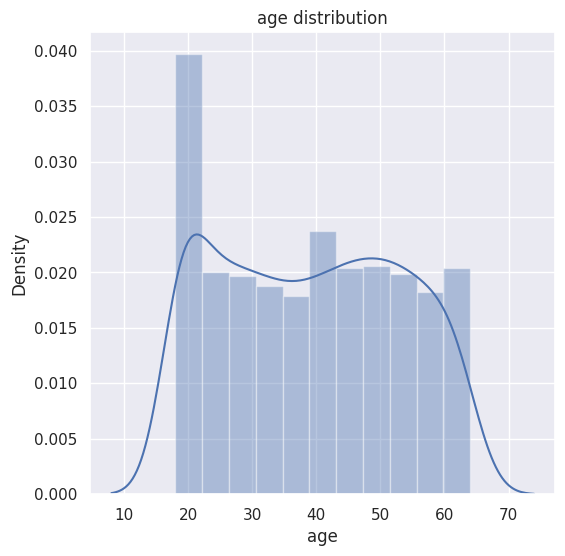

In [16]:
sns.set()
plt.figure(figsize =(6,6))
sns.distplot(dataset['age'])
plt.title("age distribution")
plt.show()


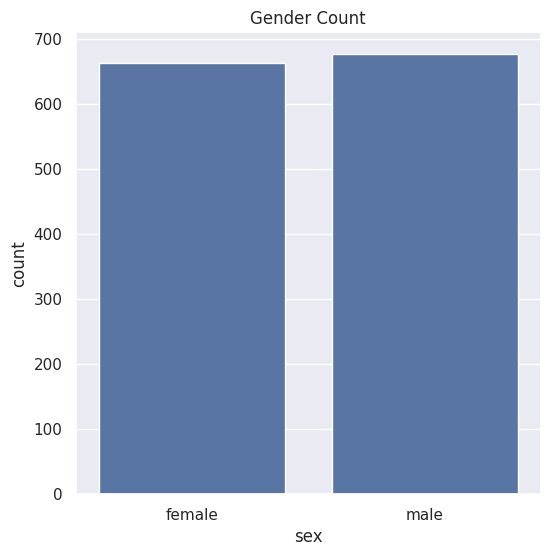

In [14]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'sex',data = dataset)
plt.title('Gender Count')
plt.show()

<ipython-input-15-98b749c93209>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['bmi'])


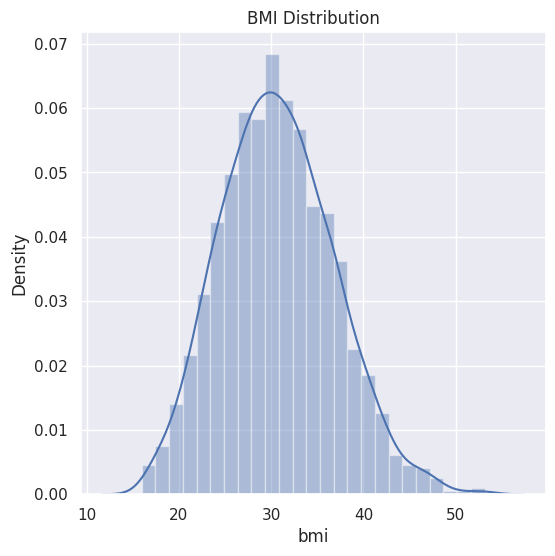

In [15]:
plt.figure(figsize = (6,6))
sns.distplot(dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

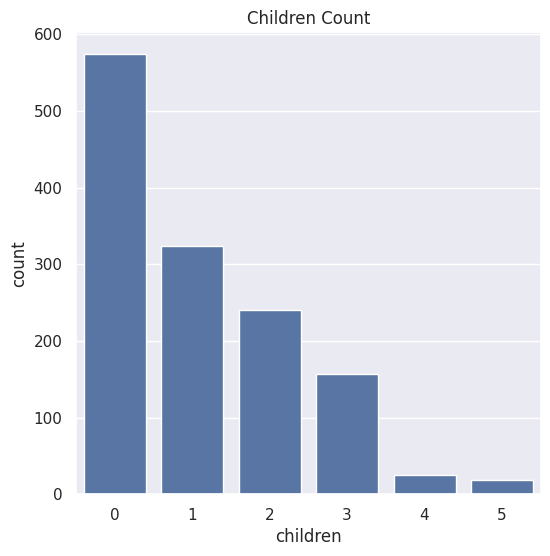

In [17]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'children',data = dataset)
plt.title('Children Count')
plt.show()

In [18]:
dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


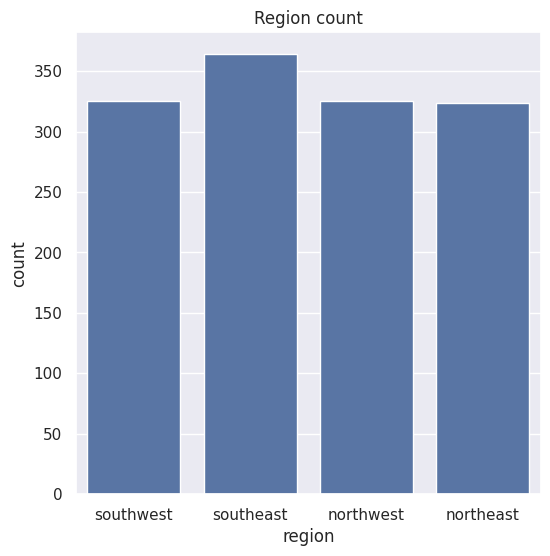

In [22]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'region',data = dataset)
plt.title('Region count')
plt.show()

<ipython-input-21-157c64c10473>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['charges'])


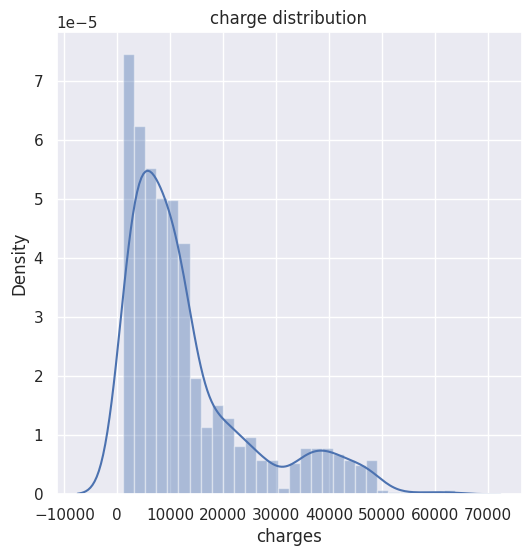

In [21]:
plt.figure(figsize = (6,6))
sns.distplot(dataset['charges'])
plt.title('charge distribution')
plt.show()

In [33]:
#encoding categorical column
dataset.replace({'sex':{'male':0,'female':1}},inplace = True)
dataset.replace({'smoker':{'yes':0,'no':1}},inplace = True)
dataset.replace({'region':{'southwest':0,'southeast':1,'northeast':2,'northwest':3}},inplace = True)

<ipython-input-33-cd64cc7d745a>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'region':{'southwest':0,'southeast':1,'northeast':2,'northwest':3}},inplace = True)


In [35]:
X = dataset.drop(columns = 'charges',axis = 1)
Y = dataset['charges']

In [36]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,0
1,18,0,33.770,1,1,1
2,28,0,33.000,3,1,1
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3


In [37]:
Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [39]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [40]:
model = LinearRegression()

In [41]:
model.fit(X_train,Y_train)

LinearRegression()

In [44]:
X_train_validation = model.predict(X_train)


In [45]:
from sklearn.metrics import r2_score
X_train_r2 = r2_score(Y_train,X_train_validation)

In [47]:
print(X_train_r2)

0.7516346664929344


In [48]:
X_test_validation = model.predict(X_test)


In [49]:
X_test_r2 = r2_score(Y_test,X_test_validation)

In [50]:
print(X_test_r2)

0.744103253976007


In [61]:
print("******************Enter the details below*****************")
age = int(input("Enter the age:"))
sex = int(input("Enter the sex:{0:male,1:female}"))
bmi = float(input("Enter the bmi:"))
children = int(input("Enter the children:"))
smoker = int(input("Enter the smoker:{0:yes,1:no}"))
region = int(input("Enter the region:{0:southwest,1:southeast,2:northeast,3:northwest}"))
input_data = (age,sex,bmi,children,smoker,region)
#Create a prediction model
input_data_array = np.asarray(input_data)
input_data_array = input_data_array.reshape(1,-1)
prediction = model.predict(input_data_array)
print("The charge is approximately:",prediction[0])

******************Enter the details below*****************
Enter the age:29
Enter the sex:{0:male,1:female}1
Enter the bmi:34
Enter the children:1
Enter the smoker:{0:yes,1:no}1
Enter the region:{0:southwest,1:southeast,2:northeast,3:northwest}3
The charge is approximately: 7243.633367397908


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
